# Batch Job Analysis -- Data Exploration for Master Batch Job
Draw data exploration diagram for MBJ
1. Line Chart about elapsed time trends in time line
2. Correlation Heat Map for all metrics
3. Boxplot for weekly, monthly pattern discovery


In [1]:

import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  #would not show warning message

Definiton of function __*drawJobs(p_df_input,...)*__ 
 - function scales data
 - function plots data

In [2]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


def drawJobs(p_df_input,p_index,p_start_date,p_end_date,p_title,p_columns,p_colors,p_scalertype=0):
    df=p_df_input.copy()
    df=df[(df['date']>=p_start_date) & (df['date']<=p_end_date)]
    df.sort_values(by=p_index,inplace=True)
    df.index=df[p_index]
    df.drop([p_index],axis=1,inplace=True)
    
    
    df1=df[p_columns]
    if p_scalertype>0:
        df1=df1.dropna()
    
    if p_scalertype==1:
        df2=StandardScaler().fit_transform(df1)  
    elif (p_scalertype==2):
        df2=MinMaxScaler().fit_transform(df1)
    elif (p_scalertype==3):
        df2=MaxAbsScaler().fit_transform(df1)
    elif (p_scalertype==4):
        df2=RobustScaler(quantile_range=(25, 75)).fit_transform(df1)
    elif (p_scalertype==5):
        df2=QuantileTransformer(output_distribution='uniform').fit_transform(df1)
    elif (p_scalertype==6):
        df2=QuantileTransformer(output_distribution='normal').fit_transform(df1)
    elif (p_scalertype==7):
        df2=Normalizer().fit_transform(df1)
    
    if p_scalertype>0:
        for j in range(len(p_columns)):
            df1[p_columns[j]]=df1[p_columns[j]].astype(np.float64)
        r=0
        for index, row in df1.iterrows():
            for j in range(len(p_columns)):
                row[j]=df2[r,j]
                #df1[index,p_columns[j]]=df2[r,j]
            #print(row)
            r=r+1
    
    plt.figure(figsize=(16,6))
   
    plt.suptitle(p_title+' By '+p_index+' ('+p_start_date.strftime("%Y-%m-%d")+' ~ '+p_end_date.strftime("%Y-%m-%d")+')',fontsize=24)

    ax1=plt.subplot()
    for i in range(len(p_columns)):
        ax1.plot(df1[p_columns[i]], p_colors[i])
        
    ax1.legend()
    
    plt.xticks(rotation='vertical')
    
    l_days=(pd.to_datetime(p_end_date).date()-pd.to_datetime(p_start_date).date())/\
          (pd.to_datetime('2018-06-02').date()-pd.to_datetime('2018-06-01').date())+1
            
    if l_days<10:
            major_ticks = np.arange(pd.to_datetime(p_start_date).date(),
                                pd.to_datetime(p_end_date).date()+relativedelta(days=1) , 
                                relativedelta(days=1))
    else:
        if l_days<=20:
            major_ticks = np.arange(pd.to_datetime(p_start_date).date(),
                                pd.to_datetime(p_end_date).date()+relativedelta(days=1) , 
                                relativedelta(days=2))
        else:
            major_ticks = np.arange(pd.to_datetime(p_start_date).date(),
                                pd.to_datetime(p_end_date).date()+relativedelta(days=1) , 
                                relativedelta(days=31))

    ax1.set_xticks(major_ticks)
    
    ax1.set_xlabel('Date', fontsize = 16)
    
    plt.grid(color='white', linestyle='-', linewidth=1)
    
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
    return

  


In [3]:
  
import pandas as pd
import numpy.random as rnd
import seaborn as sns

def drawAll(df_join,p_title):
    df_join['date']=df_join['DATE'].apply(lambda s:pd.to_datetime(s)) 
    #print(df_join)

    drawJobs(df_join,'date',pd.to_datetime('2016-01-01'),pd.to_datetime('2016-12-31'),p_title+':',['ELAPSED_MINUTE'],\
         ['r'],0)
    


    fig, ax = plt.subplots(figsize=(16, 12))
    
    l_cols=[ 'ELAPSED_MINUTE', 'MONTH', 'DAY',
       'WEEKDAY', 'IS_WEEKEND', 'IS_MONTHEND', 'IS_HOLIDAY',  'BT01', 'BT02', 'BT03',
       'BT04', 'BT05', 'BT06', 'BT07', 'BT08', 'BT09', 'BT10', 'BT11', 'BT12',
       'BT13', 'BT14', 'BT15', 'BT16']
    sns.heatmap(df_join[l_cols].corr(), annot=True, vmax=1, square=True, 
            cmap="coolwarm",fmt=".1f",ax=ax)
    plt.suptitle(p_title)
    plt.show()


    df1=df_join[['MONTH','WEEKDAY','DAY','ELAPSED_MINUTE']]

    plt.figure(figsize=(24,12))
    plt.suptitle(p_title)

    ax1=plt.subplot(311)
    ax2=plt.subplot(312)
    ax3=plt.subplot(313)

    sns.boxplot(x='MONTH', y="ELAPSED_MINUTE",  data=df1,ax=ax1,color='lightblue')
    sns.boxplot(x='DAY', y="ELAPSED_MINUTE",  data=df1,ax=ax2,color='lightgreen')
    sns.boxplot(x='WEEKDAY', y="ELAPSED_MINUTE",  data=df1,ax=ax3,color='lightgrey')



# Read data file from Dataset in MLz

1. Move text edit caret into begining of below cell
2. Click the button in upright menu, with hint of "find data"
3. Select dataset of "widetable_D_MIFID.csv",click at triangle beside "Insert to code", select "Insert Pandas DataFrame"
4. Edit code in the cell, make sure the "pc =" has a new token, remove code after line of " filepath = dsx_core_utils......." 

In [4]:
import pandas as pd

import dsx_core_utils
from dsx_core_utils import ProjectContext
# pc context contains projectName, notebookName, authToken, repositoryIP
pc = ProjectContext.ProjectContext('Batch_Job_Analytics', '2_BatchJob_MBJ_DataExploration', '', 'xx.xx.xx.xx')



job_file = dsx_core_utils.get_local_dataset(pc, 'MasterBatchJob.csv')
calendar_file = dsx_core_utils.get_local_dataset(pc, 'calendar_join.csv')
txn_file = dsx_core_utils.get_local_dataset(pc, 'TxnVolume.csv')
widetable_file=dsx_core_utils.get_local_dataset(pc, 'widetable_MBJ.csv')

In [5]:

df_job = pd.read_csv(job_file)
df_calendar=pd.read_csv(calendar_file)
df_txn=pd.read_csv(txn_file)

df_join=df_job.merge(df_calendar,how='inner',left_on='START_DATE',right_on='NEXTDAY')\
    .merge(df_txn,how='inner',left_on='DATE',right_on='DATE')


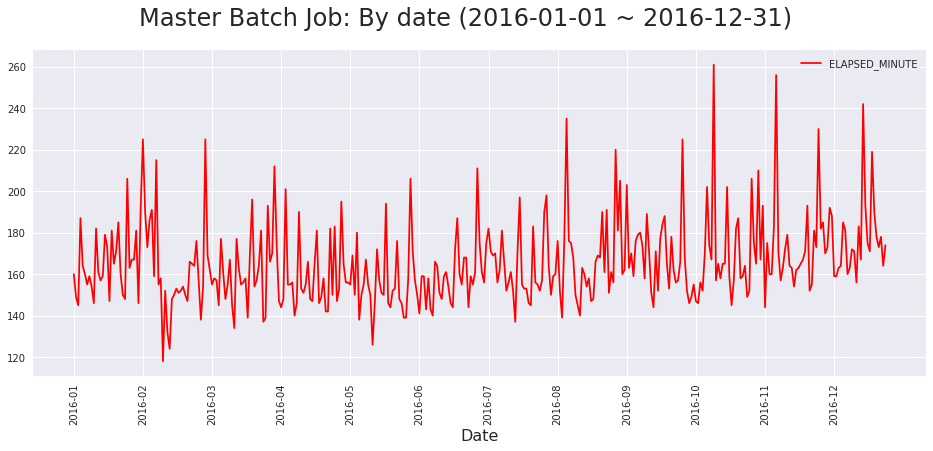

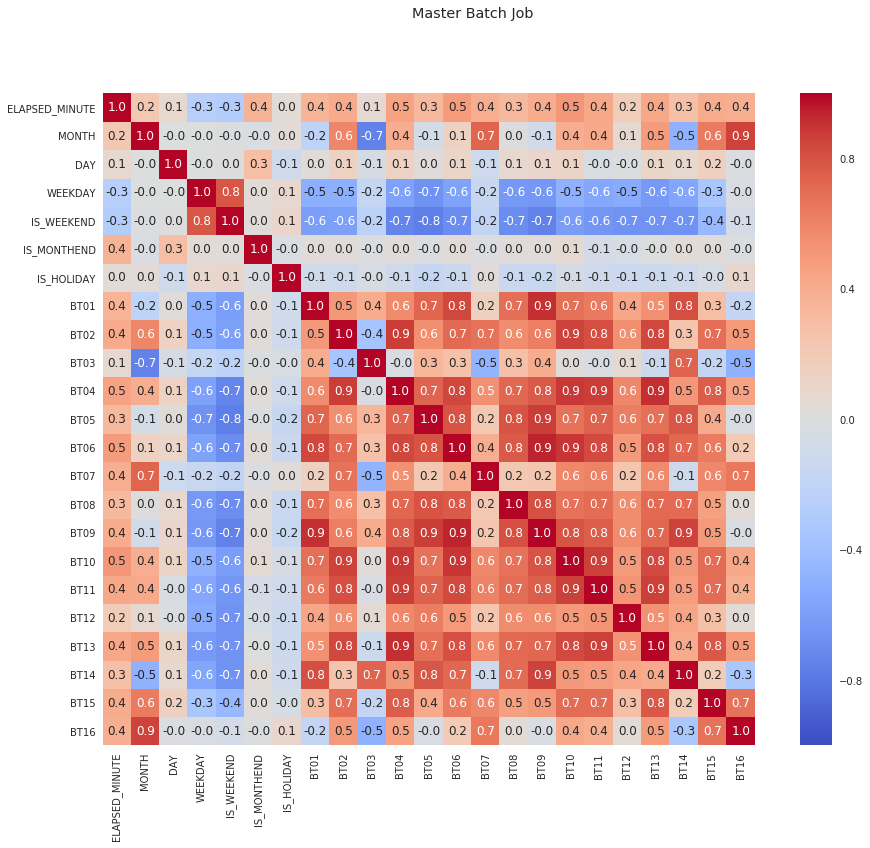

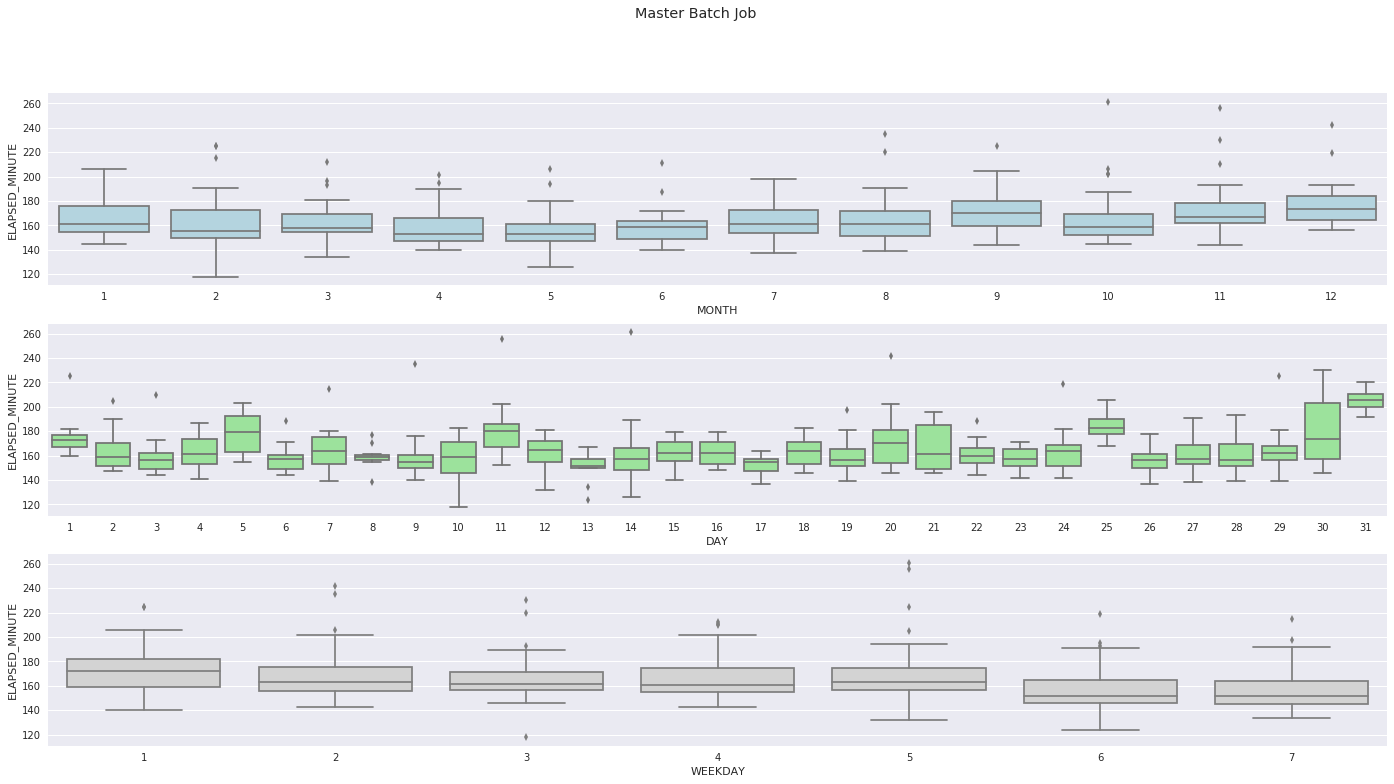

In [6]:

drawAll(df_join,'Master Batch Job')



### Next Action:
    Save joined widetable for further prediction on Elapsed Time
    


In [7]:
print(df_join.columns)
df_join.to_csv(widetable_file,index=False)


Index(['START_DATE', 'ELAPSED_MINUTE', 'DATE', 'YEAR', 'MONTH', 'DAY',
       'WEEKDAY', 'IS_WEEKEND', 'IS_MONTHEND', 'NEXTDAY', 'LASTDAY',
       'REFER_DATE', 'IS_HOLIDAY', 'IS_SPECIALDAY', 'BT01', 'BT02', 'BT03',
       'BT04', 'BT05', 'BT06', 'BT07', 'BT08', 'BT09', 'BT10', 'BT11', 'BT12',
       'BT13', 'BT14', 'BT15', 'BT16', 'date'],
      dtype='object')
